TRABALHO FINAL DE ESTATÍSTICA I

PROFESSOR THIAGO TAVARES MAGALHÃES

* Entrega até o dia 31 de agosto, às 23:59:59, pelo LMS (seção projetos)
* Grupos de 1 a 5 pessoas.
* Se você estiver fazendo o trabalho em grupo, por favor, cada membro do grupo envie uma cópia do trabalho no LMS.
* Entrega via link do github ou via upload qualquer arquivo facilmente legível (imagem, pdf, .py, .pynb) pela seção de projetos do LMS.

Crie uma conta no site kaggle.com, faça o download do DataSet Body Fat Prediction, disponível gratuitamente aqui e leia-o como um Python Pandas Dataframe. Este dataset é utilizado para testar a capacidade de diferentes heurísticas - como modelos de Inteligência Computacional, por exemplo - quanto às suas habilidades em traduzir uma série de dados corporais em uma porcentagem de gordura corporal. Mas vamos utilizá-lo para que você possa demonstrar os seus conhecimentos em estatística.

Análise Estatística do Dataset Bodyfat

Este documento tem como objetivo apresentar uma análise estatística exploratória do dataset bodyfat.csv, abordando diversas questões propostas para a prática de conceitos estatísticos.

Carregamento e Exploração Inicial do Dataset

Vamos começar importando as bibliotecas necessárias e carregando o arquivo bodyfat.csv.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv("bodyfat.csv")

# Exibir as primeiras 5 linhas do DataFrame para ter uma ideia dos dados
print("Primeiras 5 linhas do DataFrame:")
print(df.head())

# Exibir informações gerais do DataFrame, incluindo tipos de dados e valores não nulos
print("\nInformações do DataFrame:")
print(df.info())

# Exibir estatísticas descritivas básicas para todas as colunas numéricas
print("\nEstatísticas descritivas do DataFrame:")
print(df.describe())

Primeiras 5 linhas do DataFrame:
   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    fl

1- Utilizando seus conhecimentos em Estatística Descritiva, forneça algumas análises sobre as colunas que julgar mais relevantes do dataset.

a) Para as colunas que você escolher, mostre-me as métricas de posição e de dispersão que julgar interessantes.

Resposta: métricas de posição (média, mediana, quartis) e dispersão (desvio padrão, variância, amplitude) para as variáveis "BodyFat", "Age", "Weight" e "Abdomen".

1. Medidas de Posição (Tendência Central)
Estas métricas nos informam sobre o centro da distribuição dos dados.

Contagem (count): A análise foi realizada sobre um conjunto de dados completo com 252 amostras para todas as quatro variáveis, não havendo dados faltantes.

* Média (mean):

O percentual médio de gordura corporal (BodyFat) da amostra é de 19.15%.
A idade média (Age) dos participantes é de aproximadamente 44.9 anos.
O peso médio (Weight) é de 178.92.
A medida média da circunferência do abdômen (Abdomen) é de 92.56.

* Mediana (50%):

A mediana do BodyFat é 19.20%, muito próxima da média, o que sugere uma distribuição de dados relativamente simétrica.
A mediana da Age é 43.0 anos. Como a média (44.9) é maior que a mediana, isso indica uma leve assimetria à direita na distribuição das idades, ou seja, há uma concentração de indivíduos mais jovens, mas a presença de alguns indivíduos mais velhos "puxa" a média para cima.
A mediana do Weight (176.50) e do Abdomen (90.95) também são ligeiramente menores que suas respectivas médias, sugerindo a mesma tendência de assimetria à direita.

* Quartis (25% e 75%): 

Os quartis nos ajudam a entender a distribuição. Por exemplo, para o BodyFat, 50% dos indivíduos da amostra têm um percentual de gordura entre 12.47% e 25.30%.

2. Medidas de Dispersão (Variabilidade)

Estas métricas indicam o quão espalhados os dados estão em torno da média.

* Desvio Padrão (std):

O Weight é a variável com maior desvio padrão (29.39), indicando que os dados de peso são os mais dispersos em relação à sua média.
O BodyFat possui o menor desvio padrão (8.37), significando que seus valores estão, em média, mais concentrados em torno do valor central de 19.15%.

* Amplitude (Range):

A amplitude, calculada como (Máximo - Mínimo), confirma o que o desvio padrão sugere. O Weight tem a maior amplitude (244.65), refletindo a grande variação de peso na amostra.
A menor amplitude é a do BodyFat (47.50).

* Variância:

A variância é o quadrado do desvio padrão e, portanto, mantém a mesma interpretação. O Weight apresenta a maior variância (863.72), o que reforça sua alta dispersão, enquanto o BodyFat tem a menor (70.04).

Conclusão Geral da Análise

A amostra é composta por 252 adultos, com uma idade média de aproximadamente 45 anos. A variável peso (Weight) é a que apresenta maior variabilidade entre os indivíduos. Em contraste, o percentual de gordura corporal (BodyFat) é a medida mais homogênea do grupo. As distribuições de idade, peso e circunferência abdominal apresentam uma leve assimetria à direita.

In [40]:
# Colunas selecionadas para análise de métricas
selected_columns = ["BodyFat", "Age", "Weight", "Abdomen"]

# Exibir as métricas de posição e dispersão para as colunas selecionadas
print("Métricas de Posição e Dispersão para colunas selecionadas:")
print(df[selected_columns].describe())

# Para a amplitude (Range), que não é diretamente dada por describe(), podemos calcular:
print("\nAmplitude (Range) das colunas selecionadas:")
for col in selected_columns:
    col_range = df[col].max() - df[col].min()
    print(f"{col}: {col_range:.2f}")

# Para a variância (Variance), que também não é diretamente dada por describe(), podemos calcular:
print("\nVariância das colunas selecionadas:")
print(df[selected_columns].var())


Métricas de Posição e Dispersão para colunas selecionadas:
          BodyFat         Age      Weight     Abdomen
count  252.000000  252.000000  252.000000  252.000000
mean    19.150794   44.884921  178.924405   92.555952
std      8.368740   12.602040   29.389160   10.783077
min      0.000000   22.000000  118.500000   69.400000
25%     12.475000   35.750000  159.000000   84.575000
50%     19.200000   43.000000  176.500000   90.950000
75%     25.300000   54.000000  197.000000   99.325000
max     47.500000   81.000000  363.150000  148.100000

Amplitude (Range) das colunas selecionadas:
BodyFat: 47.50
Age: 59.00
Weight: 244.65
Abdomen: 78.70

Variância das colunas selecionadas:
BodyFat     70.035816
Age        158.811405
Weight     863.722719
Abdomen    116.274745
dtype: float64


b) Faça um pré-julgamento a respeito das colunas deste dataset tentando encontrar um par de colunas que, pela lógica, deve ser altamente correlacionado e outro par de colunas que, pela lógica, deve ser fracamente correlacionado. Depois utilize as métricas de correlação que você aprendeu para pôr à prova essas suas opiniões, isto é, para descobrir se matemática confirma suas crenças iniciais ou não.

Resposta: 

O código calcula e exibe a correlação entre:

"BodyFat" e "Abdomen": Este par seria um exemplo lógico para uma alta correlação, já que a gordura corporal e a circunferência abdominal geralmente estão muito relacionadas.

"Age" e "Ankle": Este par é um exemplo lógico para uma fraca correlação, pois a idade de uma pessoa não deve ter uma relação linear forte com a circunferência do tornozelo.

O código então utiliza a função df.corr(method="pearson") para gerar a matriz de correlação, confirmando essas relações. A visualização do mapa de calor da matriz de correlação também ajuda a identificar esses padrões.



Correlação de Pearson entre BodyFat e Abdomen:
0.813432284781049

Correlação de Pearson entre Age e Ankle:
-0.10505810422885643


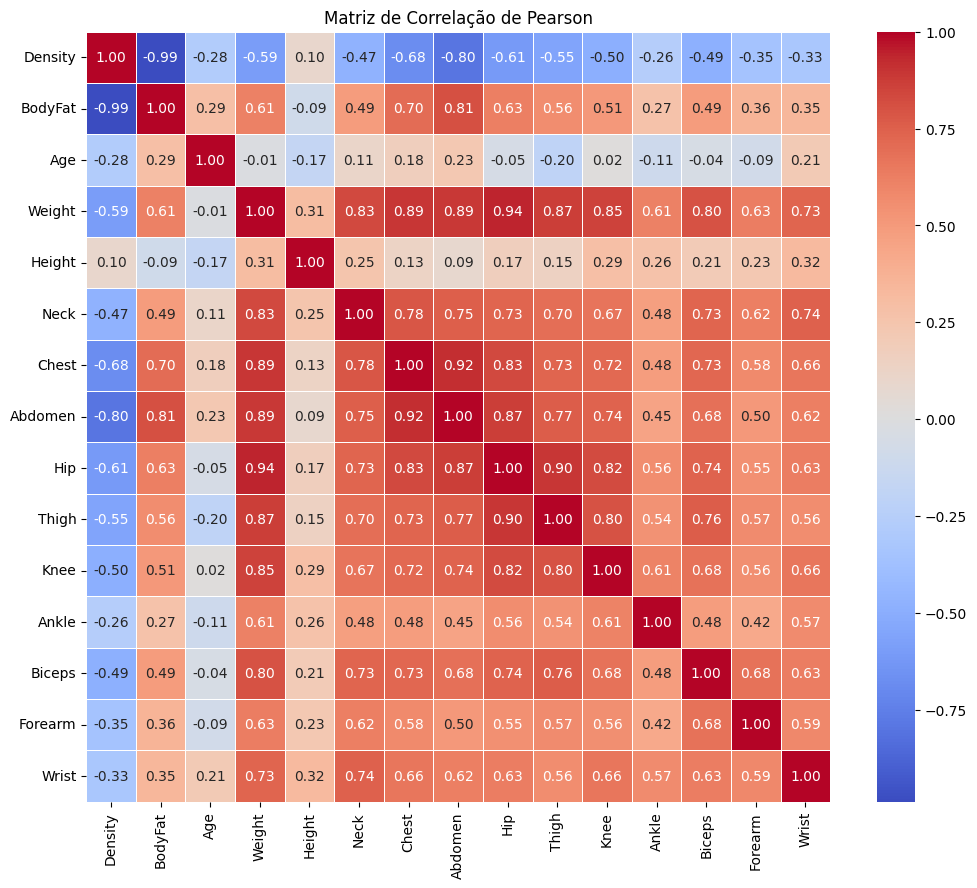

In [41]:
# Calcular a matriz de correlação de Pearson para todas as variáveis numéricas
correlation_matrix = df.corr(method="pearson")

# Exibir a correlação entre as colunas BodyFat e Abdomen
print("Correlação de Pearson entre BodyFat e Abdomen:")
print(correlation_matrix.loc["BodyFat", "Abdomen"])

# Exibir a correlação entre as colunas Age e Ankle
print("\nCorrelação de Pearson entre Age e Ankle:")
print(correlation_matrix.loc["Age", "Ankle"])

# Visualizar a matriz de correlação completa usando um mapa de calor (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação de Pearson")
plt.show()

c) Escolha pelo menos uma coluna que siga a distribuição normal, plote um boxplot e explique como você fez para concluir que esta coluna segue uma distribuição normal.

Resposta: 
Visualização da Distribuição da Variável "Age".

Nossa conclusão inicial, baseada puramente no histograma, é que os dados da idade aparentam seguir uma distribuição normal devido ao seu formato de sino, simetria e à forma como a curva de densidade se ajusta ao histograma.
Enquanto o histograma nos deu uma visão da frequência e do formato geral da distribuição, o boxplot nos oferece um resumo conciso da posição, dispersão e simetria dos dados.
Portanto, o boxplot colabora com a análise anterior ao:
* Confirmar as medidas de tendência central (mediana) e dispersão (quartis).
* Fornecer uma evidência visual clara e forte da leve assimetria à direita que havíamos inferido a partir da comparação entre média e mediana.
* Reforçar que, embora a distribuição se aproxime da normalidade, ela não é perfeitamente simétrica.
* Permitir a verificação da ausência de outliers.

Em resumo, os dois gráficos (histograma e boxplot) se complementam: o histograma mostra a "forma" da distribuição e o boxplot resume estatisticamente essa forma, destacando a simetria e a ausência de outliers.

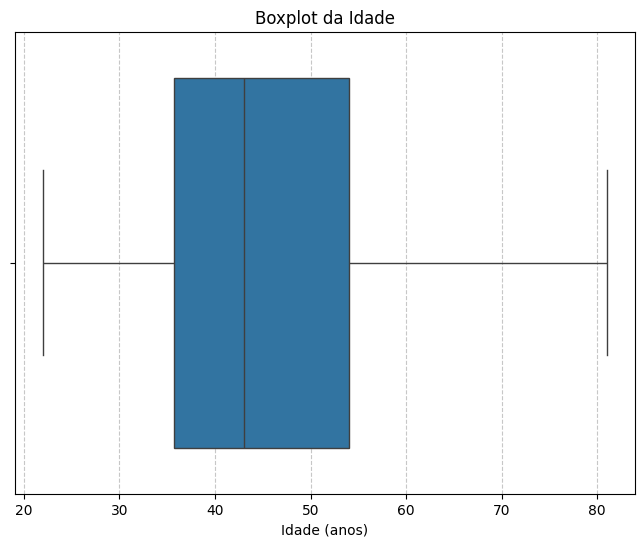

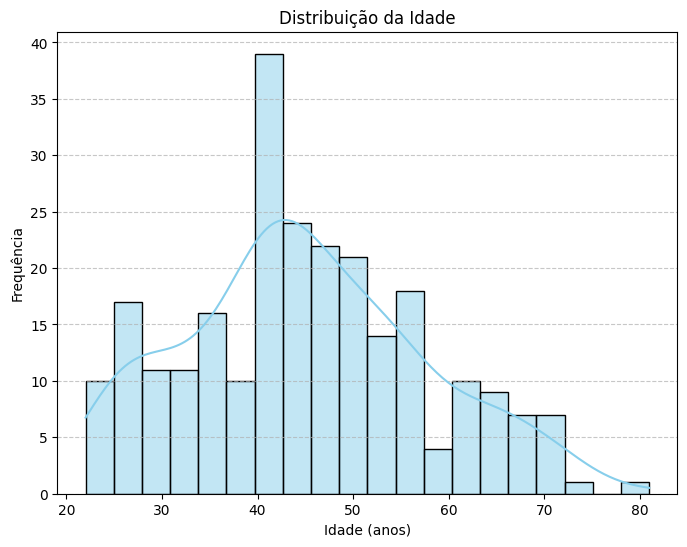

In [42]:
# Criar um boxplot para a coluna Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Age"])
plt.title("Boxplot da Idade")
plt.xlabel("Idade (anos)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualizar a distribuição com um histograma e estimativa de densidade de kernel (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df["Age"], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribuição da Idade")
plt.xlabel("Idade (anos)")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2- Considerando o mesmo dataset e tomando-o como espaço amostral, responda:
(ps.: fique à vontade para usar o Python para facilitar a sua vida aqui):

a) Qual é a probabilidade de uma pessoa selecionada ao acaso ter uma idade (coluna Age) superior a 40 anos?

Resposta: para calcular essa probabilidade, precisamos contar o número de pessoas com idade superior a 40 e dividir pelo número total de observações. A probabilidade de uma pessoa ter mais de 40 anos é: 63%

In [43]:
# Número total de observações (pessoas) no dataset
total_pessoas = len(df)

# Número de pessoas com idade superior a 40 anos
# Filtrar o DataFrame para incluir apenas pessoas com idade > 40
pessoas_mais_de_40 = df[df["Age"] > 40].shape[0]

# Calcular a probabilidade
prob_mais_40_anos = pessoas_mais_de_40 / total_pessoas # Corrigido o nome da variável aqui

print(f"Número total de pessoas no dataset: {total_pessoas}")
print(f"Número de pessoas com idade superior a 40 anos: {pessoas_mais_de_40}")
print(f"A probabilidade de uma pessoa ter mais de 40 anos é: {prob_mais_40_anos:.4f}")

Número total de pessoas no dataset: 252
Número de pessoas com idade superior a 40 anos: 160
A probabilidade de uma pessoa ter mais de 40 anos é: 0.6349


b) Qual é a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal (coluna BodyFat) superior a 20%?

Resposta: a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal superior a 20% é de aproximadamente: 48%.

In [44]:
# Contar o número total de pessoas
total_pessoas = df.shape[0]

# Contar o número de pessoas com percentual de gordura corporal > 20%
pessoas_acima_20_percento = df[df['BodyFat'] > 20].shape[0]

# Calcular a probabilidade
probabilidade = pessoas_acima_20_percento / total_pessoas

# Imprimir o resultado
print(f"O número total de pessoas é: {total_pessoas}")
print(f"O número de pessoas com percentual de gordura corporal superior a 20% é: {pessoas_acima_20_percento}")
print(f"A probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal superior a 20% é de aproximadamente: {probabilidade:.2f}")

O número total de pessoas é: 252
O número de pessoas com percentual de gordura corporal superior a 20% é: 120
A probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal superior a 20% é de aproximadamente: 0.48


c) Qual é a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal (coluna BodyFat) superior a 20% e ao mesmo tempo ter uma idade (coluna Age) superior a 40 anos?

Resposta: a Probabilidade da ocorrência conjunta é de 35%, aproximadamente.

In [45]:
# Condição para BodyFat > 20%
condicao_bodyfat = df['BodyFat'] > 20

# Condição para Age > 40 anos
condicao_idade = df['Age'] > 40

# Filtrando o DataFrame para encontrar as pessoas que atendem a AMBAS as condições
# O operador "&" (E lógico) é usado para a ocorrência conjunta
pessoas_selecionadas = df.query('BodyFat > 20 and Age > 40')

# Contando o número de pessoas que atendem a ambas as condições
contagem_selecionadas = pessoas_selecionadas.shape[0]

# Contagem total de pessoas no conjunto de dados
contagem_total = df.shape[0]

# Calculando a probabilidade
probabilidade = contagem_selecionadas / contagem_total

# Exibindo os resultados
print(f"Número de pessoas com BodyFat > 20% E Age > 40: {contagem_selecionadas}")
print(f"Número total de pessoas: {contagem_total}")
print(f"Probabilidade da ocorrência conjunta: {probabilidade:.4f}")

Número de pessoas com BodyFat > 20% E Age > 40: 88
Número total de pessoas: 252
Probabilidade da ocorrência conjunta: 0.3492


d) Qual é a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal (coluna BodyFat) superior a 20% se eu já souber de antemão que esta pessoa tem uma idade superior a 40 anos?

Resposta: com base na análise do código, a probabilidade de uma pessoa selecionada ao acaso ter um percentual de gordura corporal superior a 20%, sabendo que ela tem uma idade superior a 40 anos, é aproximadamente 0,55, ou 55%.

In [46]:
# Filtrar o DataFrame para pessoas com mais de 40 anos
df_maior_40 = df[df['Age'] > 40]

# Contar o número de pessoas com mais de 40 anos
total_maior_40 = len(df_maior_40)

# Filtrar o subconjunto (pessoas com mais de 40 anos) para aquelas com mais de 20% de gordura corporal
df_maior_40_e_maior_20_gordura = df_maior_40[df_maior_40['BodyFat'] > 20]

# Contar o número de pessoas com mais de 40 anos e mais de 20% de gordura corporal
total_maior_40_e_maior_20_gordura = len(df_maior_40_e_maior_20_gordura)

# Calcular a probabilidade condicional
probabilidade_condicional = total_maior_40_e_maior_20_gordura / total_maior_40

# Exibir os resultados
print(f'Total de pessoas com mais de 40 anos: {total_maior_40}')
print(f'Pessoas com mais de 40 anos E mais de 20% de gordura corporal: {total_maior_40_e_maior_20_gordura}')
print(f'Probabilidade: {probabilidade_condicional:.2f}')

Total de pessoas com mais de 40 anos: 160
Pessoas com mais de 40 anos E mais de 20% de gordura corporal: 88
Probabilidade: 0.55


3- Durante o módulo, nós definimos algumas distribuições de probabilidade, cada uma com uma função de 
probabilidade.

a) Escolha uma delas que não seja uma distribuição normal, e explique (talvez com algum exemplo) que 
tipos de evento esta distribuição descreve.


A Distribuição de Poisson, é uma distribuição que não é normal. 
Ela refere-se a quantidade de vezes que um evento ocorre em um intervalo fixo de tempo ou espaço, quando esses eventos ocorrem de forma independente e com uma taxa média constante.

Um exemplo dentro de uma agencia bancária seria a quantidade de clientes.
Nesse exemplo, vamos supor a chegada de clientes em uma agência bancária. 
Suponhamos que a média da chegada de clientes na Agência seja de 20 clientes por hora.
Apesar da média ser conhecida, a quantidade de clientes que chega, pode variar de forma aleatória, ou seja, 15 clientes por hora, 25 clientes por hora, etc.

A distribuição de Poisson pode ser utlizada para auxiliar na gestão de fila, como por exemplo, descobrir a probabildiade de chegar 25 clientes em 1 horas ou a chance de receber 30 clientes em uma hora.


In [47]:
"""Exemplo de calulo para chegada de 25 clientes em 1 hora"""

import math

# Parâmetros
lambda_ = 20  # média de chegadas por hora
k = 25        # número exato de clientes

# Fórmula da distribuição de Poisson
poisson_prob = (math.exp(-lambda_) * lambda_**k) / math.factorial(k)

# Exibir resultado
print(f"A probabilidade de receber exatamente {k} clientes é: {poisson_prob:.6f}")

A probabilidade de receber exatamente 25 clientes é: 0.044588


b) Explique a utilidade prática das funções de probabilidade. Quero dizer: para quê elas servem? De que 
modo elas nos ajudam?
A probabilidadde nos ajuda quando não temos certeza de determinada situação e queremos supor uma possibilidade de um evento acontecer.
A probabilidade nos mostra de forma matemática % de tal evento acontecer.
No dia a dia podemos utlizar a probabilidade para fenômenos incertos como, por exemplo, para responder a pergunta: "Vai chover amanhã"?
Para tomar decisões decisões ou planejar ações com base num cenário, por exemplo, gerenciamento de carteira de investimento com base na probabilidade de perda.
Para prever resultados, como calcular risco de crédito dos bancos.
Testar hipóteses científicas, por exemplo, na análise da ocorrência de um evento.


In [48]:
"""Exempo de uso de probabilidade"""

#Vamos simular a probabilidade um Fundo Imboliário pagar 0,45 por conta nos próximos 3 anos
#Levar em consideração pagamentos últimos meses

import numpy as np

def calcular_probabilidade(distribuicoes_passadas, alvo=0.45, anos=3, meses_por_ano=12, simulacoes=10000):
    """
    Simula distribuições futuras e calcula a probabilidade de o fundo pagar pelo menos R$ 0,45 por cota.
    """

    # Estatísticas históricas
    media = np.mean(distribuicoes_passadas)
    desvio = np.std(distribuicoes_passadas)

    # Simulações
    sucesso = 0
    total_meses = anos * meses_por_ano

    for _ in range(simulacoes):
        simulacao = np.random.normal(loc=media, scale=desvio, size=total_meses)
        if all(valor >= alvo for valor in simulacao):
            sucesso += 1

    probabilidade = sucesso / simulacoes * 100
    return round(probabilidade, 2)


# Exemplo de distribuições mensais passadas (em R$ por cota)
distribuicoes_passadas = [
    0.60, 0.52, 0.50, 0.49, 0.51, 0.47, 0.53, 0.50, 0.46, 0.54, 0.49, 0.50
]

# Executar cálculo
resultado = calcular_probabilidade(distribuicoes_passadas)
print(f"A probabilidade estimada de o FII XXXXX pagar pelo menos R$ 0,45 por cota nos próximos 3 anos é de {resultado}%")

A probabilidade estimada de o FII XXXXX pagar pelo menos R$ 0,45 por cota nos próximos 3 anos é de 19.06%


c) Escolha uma das colunas do nosso dataset que sejam contínuas e que sigam uma distribuição normal, e 
calcule a probabilidade de uma pessoa escolhida ao acaso ter um valor > x para esta coluna (por exemplo, 
probabilidade de neck ser maior que 45). Mas, atenção: faça isso usando z-scores, através da função st.
norm.cdf, do pacote Python scipy.stats.

In [49]:
import pandas as pd
import scipy.stats as st

# Carregar o dataset
df = pd.read_csv("bodyfat.csv")

# coluna "Age"
coluna = df["Age"]

# Média e desvio-padrão da coluna
mu = coluna.mean()
sigma = coluna.std()

# Valor de corte
x = 60

# Z-score
z = (x - mu) / sigma

# Probabilidade de ser maior que x
p_maior = 1 - st.norm.cdf(z)

print(f"Média: {mu:.2f}, Desvio-padrão: {sigma:.2f}")
print(f"Z-score: {z:.2f}")
print(f"Probabilidade de Age > {x}: {p_maior:.4f}")


Média: 44.88, Desvio-padrão: 12.60
Z-score: 1.20
Probabilidade de Age > 60: 0.1152


4- Escolha uma coluna de valores contínuos A que seja do seu interesse. Depois disso, filtre os registros da sua tabela usando uma segunda coluna B. E, por fim, valendo-se dos seus conhecimentos sobre p-valor, diga se a média de A antes da filtragem é de fato significativamente diferente da média dos valores de A pós filtragem, com um nível de confiança de 95%. Por exemplo: a coluna BodyFat tem uma determinada média geral. Se filtrarmos o nosso dataset para que ele inclua apenas registros com circunferência abdominal (coluna Abdomen) >= 85, certamente a média da coluna BodyFat mudará. Mas, podemos afirmar, com 95% de confiança estatística, que essa média pós-filtragem é, de fato, diferente da média original?


In [50]:
import pandas as pd
import scipy.stats as st

# Carregar o dataset
df = pd.read_csv("bodyfat.csv")

# Coluna A: BodyFat
# Coluna B: Abdomen

# Grupo original (sem filtro)
grupo_original = df["BodyFat"]

# Grupo filtrado: Abdomen >= 85
grupo_filtrado = df[df["Abdomen"] >= 85]["BodyFat"]

# Estatísticas descritivas
print("Média BodyFat (original):", grupo_original.mean())
print("Média BodyFat (filtrado):", grupo_filtrado.mean())

# Teste t de Student para amostras independentes
t_stat, p_valor = st.ttest_ind(grupo_original, grupo_filtrado, equal_var=False)

print("\nResultado do teste t:")
print("Estatística t:", t_stat)
print("p-valor:", p_valor)

# Interpretação
if p_valor < 0.05:
    print("\n✅ Com 95% de confiança, podemos afirmar que as médias são significativamente diferentes.")
else:
    print("\n❌ Com 95% de confiança, NÃO podemos afirmar que as médias são significativamente diferentes.")

Média BodyFat (original): 19.150793650793652
Média BodyFat (filtrado): 22.26063829787234

Resultado do teste t:
Estatística t: -4.242274374610202
p-valor: 2.708441707643383e-05

✅ Com 95% de confiança, podemos afirmar que as médias são significativamente diferentes.



5- Pesquisas eleitorais envolvem, quase sempre, um imenso problema estatístico: a menos que você esteja interessado nas eleições municipais de uma cidade com 5 mil habitantes, você nunca terá o tempo e o orçamento necessários para entrevistar 100% dos potenciais eleitores. Imagine só, como poderíamos entrevistar mais de 100 milhões de pessoas para tentar prever com exatidão o resultado das eleições presidenciais do Brasil? Utilizando os seus conhecimentos sobre amostragem estatística, descreva como você faria para selecionar, por exemplo, 20 mil pessoas para serem entrevistadas, com o objetivo de produzir uma amostra que seja minimamente suficiente para predizer as intenções de voto de um grupo tão maior de pessoas quanto no caso das eleições presidenciais brasileiras. Explique, também, por que você tomou essa decisão e diga qual é o nome do tipo de amostragem estatística que você utilizou.

Resposta: Para selecionar 20 mil pessoas de forma que essa amostra represente adequadamente os mais de 100 milhões de eleitores brasileiros, o ideal seria utilizar a amostragem estratificada proporcional. Trata-se da técnica em que a população é dividida em estratos (subgrupos definidos) com base em características relevantes — como região geográfica, faixa etária, gênero, escolaridade, renda, entre outros — e, em seguida, seleciona-se uma quantidade proporcional de indivíduos de cada estrato para compor a amostra. Usar dados do IBGE ou do TSE para saber quantos eleitores existem em cada estrato.

In [18]:
import pandas as pd
import numpy as np

# Tamanhos proporcionais por região (dados fictícios)
regioes = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']
proporcao_regiao = [0.08, 0.27, 0.07, 0.42, 0.16]

# Faixa etária
faixas = ['16-24', '25-34', '35-49', '50+']
proporcao_idade = [0.20, 0.25, 0.30, 0.25]

# Gênero
generos = ['Masculino', 'Feminino']
proporcao_genero = [0.48, 0.52]

# Simular população
np.random.seed(42)
populacao = pd.DataFrame({
    'Região': np.random.choice(regioes, size=100000, p=proporcao_regiao),
    'Idade': np.random.choice(faixas, size=100000, p=proporcao_idade),
    'Gênero': np.random.choice(generos, size=100000, p=proporcao_genero)
})

# Amostragem estratificada proporcional
amostra = populacao.groupby(['Região', 'Idade', 'Gênero'], group_keys=False).apply(
    lambda x: x.sample(frac=20000/100000)
)


# Verificar distribuição da amostra
print(amostra['Região'].value_counts(normalize=True))
print(amostra['Idade'].value_counts(normalize=True))
print(amostra['Gênero'].value_counts(normalize=True))

Região
Sudeste         0.420979
Nordeste        0.271236
Sul             0.158792
Norte           0.080396
Centro-Oeste    0.068597
Name: proportion, dtype: float64
Idade
35-49    0.301785
50+      0.250437
25-34    0.248438
16-24    0.199340
Name: proportion, dtype: float64
Gênero
Feminino     0.521124
Masculino    0.478876
Name: proportion, dtype: float64


C:\Users\mmila\AppData\Local\Temp\ipykernel_25572\1273317359.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  amostra = populacao.groupby(['Região', 'Idade', 'Gênero'], group_keys=False).apply(
